In [1]:
import pandas as pd 
import numpy as np
from xgboost import XGBClassifier
import shap
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")  

c:\Users\jun99\anaconda3\envs\'tem'\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\jun99\anaconda3\envs\'tem'\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_ma

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
train = pd.read_csv('../../data/hr_tr.csv')
valid = pd.read_csv('../../data/hr_val.csv')
test = pd.read_csv('../../data/hr_te.csv')

ex1 = pd.read_csv('../../data2_2024/Kidney biopsy_External_Final_신촌.csv', encoding='cp949')

In [4]:
print(train.columns)
print(valid.columns)
print(test.columns)

print(ex1.columns)

Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HR'],
      dtype='object')
Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HR'],
      dtype='object')
Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HR'],
      dtype='object')
Index(['FINAL', '(실명)등록번호', '연구등록번호', '외부', '병리작성일', '서식키', '병리번호', '병리진단',


In [5]:
ex_copy = ex1[['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb',
       'bun', 'cr', 'eGFR', 'blood_dip', 'protein_dip', 'acr_urine',
       'pcr_urine', 'glu', 'glu_urine', 'esterase_urine', 'RBC', 'WBC']].copy()

In [6]:
print(train.shape)
print(valid.shape)
print(test.shape)

print(ex_copy.shape)

(6171, 24)
(411, 24)
(1646, 24)
(760, 19)


##  column 변경

In [7]:
train.columns = ['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HR']

valid.columns = ['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HR']

test.columns = ['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HR']

In [8]:
print(train.columns)

print(train.shape)

Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HR'],
      dtype='object')
(6171, 24)


### EDA

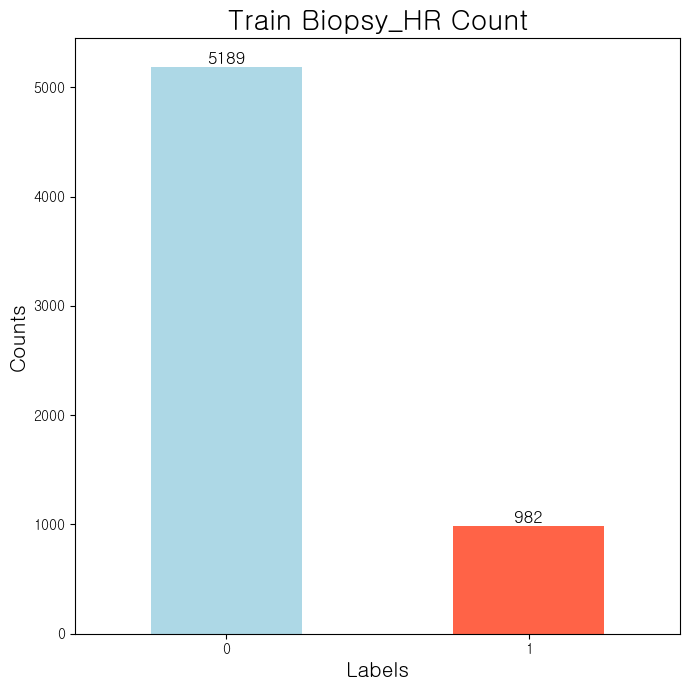

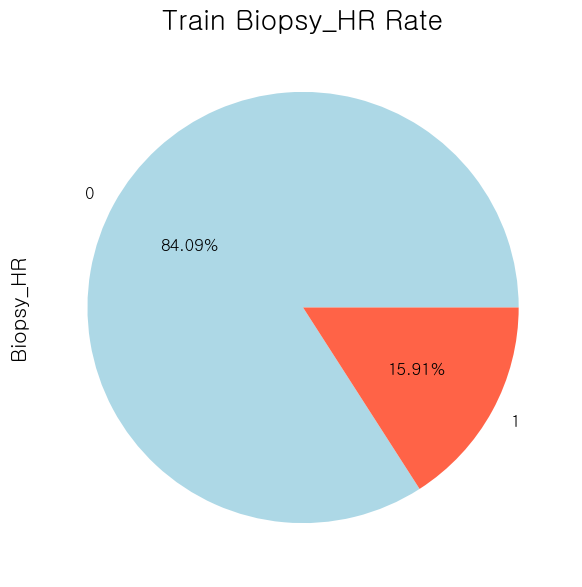

In [9]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('Train Biopsy_HR Count', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

# Get the value counts of 'Biopsy_HR' and plot as a bar plot
train['Biopsy_HR'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(train['Biopsy_HR'].value_counts().sort_index()):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('Train Biopsy_HR Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

train['Biopsy_HR'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

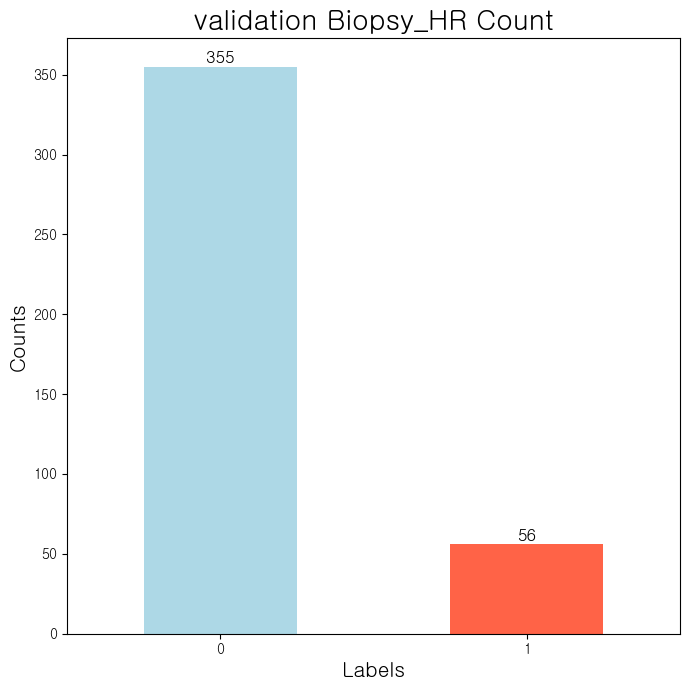

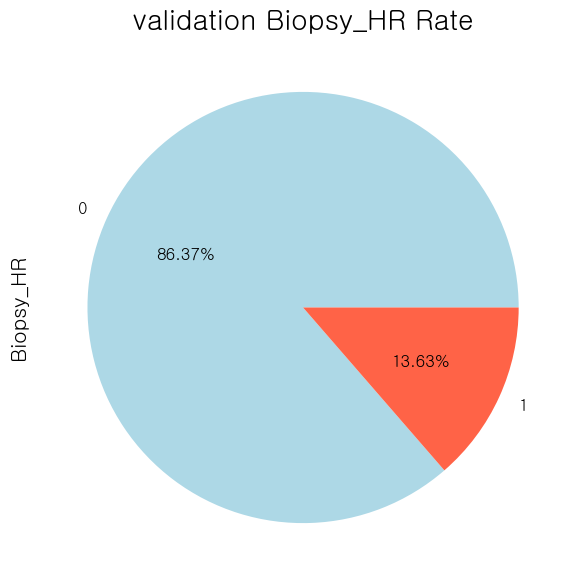

In [10]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('validation Biopsy_HR Count', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

valid['Biopsy_HR'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(valid['Biopsy_HR'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('validation Biopsy_HR Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

valid['Biopsy_HR'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

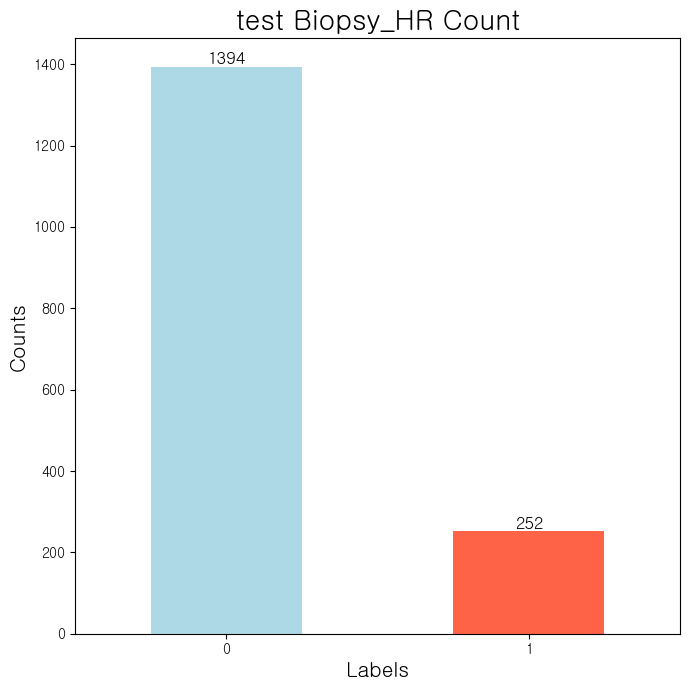

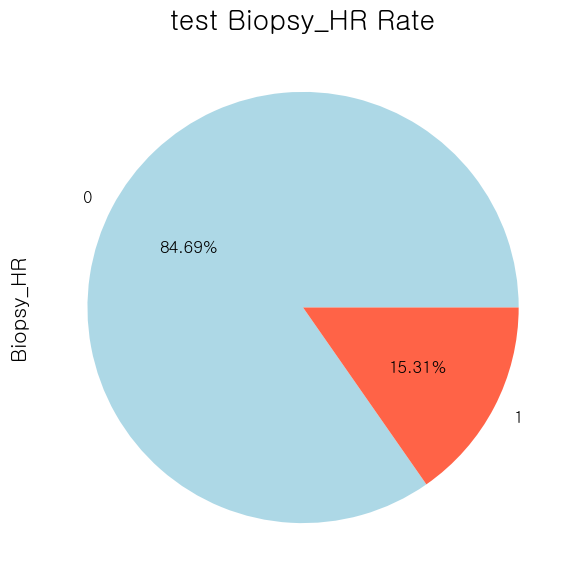

In [11]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('test Biopsy_HR Count', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

test['Biopsy_HR'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(test['Biopsy_HR'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('test Biopsy_HR Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

test['Biopsy_HR'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

## Modeling

In [12]:
xgb = XGBClassifier(random_state = 2023, n_jobs=-1)

In [13]:
X_train = train.drop(['Biopsy_HR','RBC_binary', 'WBC_binary', 'esterase_binary','dysmorphism'], axis=1).copy()
y_train = train['Biopsy_HR'].copy()

X_valid = valid.drop(['Biopsy_HR','RBC_binary', 'WBC_binary', 'esterase_binary','dysmorphism'], axis=1).copy()
y_valid = valid['Biopsy_HR'].copy()

X_test = test.drop(['Biopsy_HR','RBC_binary', 'WBC_binary', 'esterase_binary','dysmorphism'], axis=1).copy()
y_test = test['Biopsy_HR'].copy()

In [14]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=2023, ...)

In [15]:
y_valid

0      0
1      0
2      0
3      1
4      0
      ..
406    1
407    1
408    0
409    0
410    1
Name: Biopsy_HR, Length: 411, dtype: int64

### Shap

In [16]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

In [17]:
shap.initjs()

In [18]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])


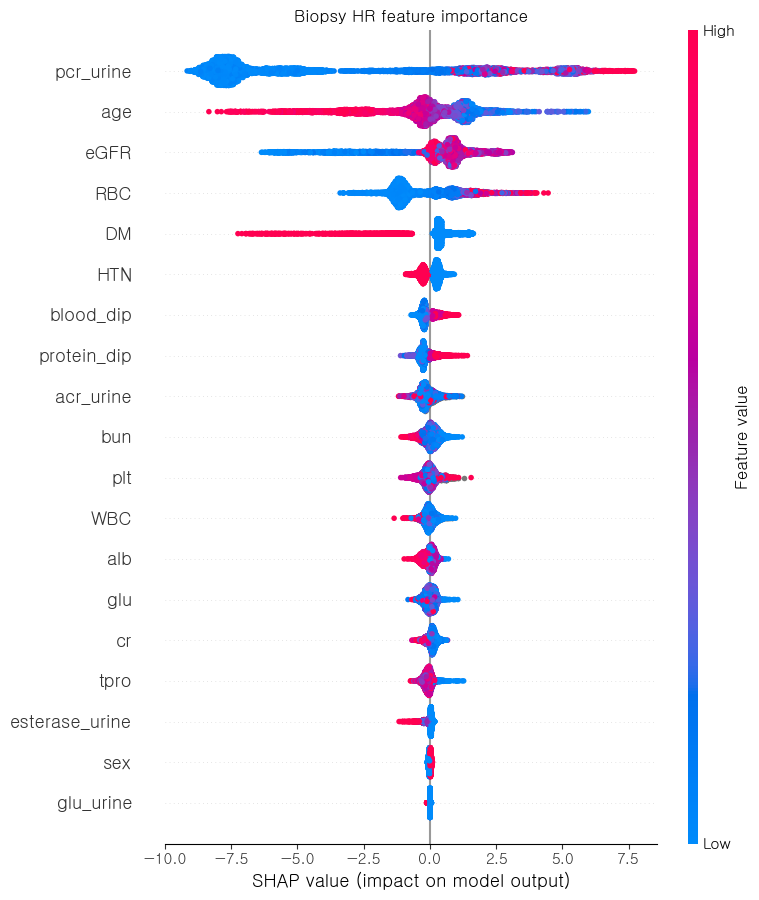

In [19]:
plt.figure(figsize=[10,10])

plt.title('Biopsy HR feature importance')
shap.summary_plot(shap_values, X_train)

plt.show()

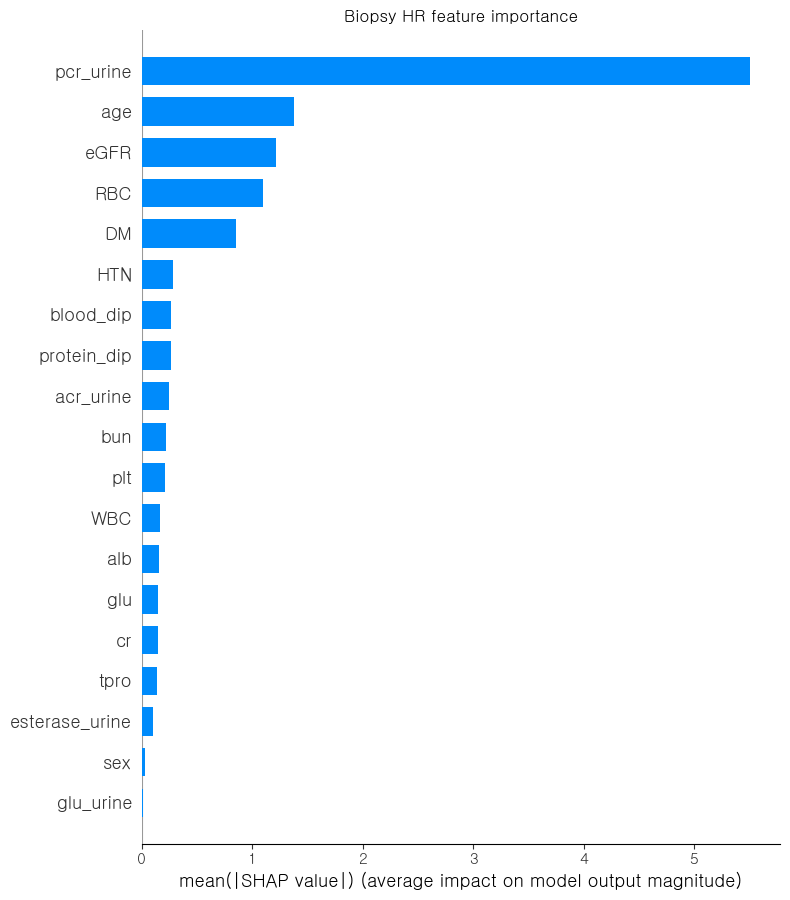

In [20]:
plt.figure(figsize=[10,10])

plt.title('Biopsy HR feature importance')
shap.summary_plot(shap_values, X_train, plot_type="bar")

plt.show()

### Train set performance

In [21]:
train_pred = xgb.predict(X_train)
train_pred_prob = xgb.predict_proba(X_train)

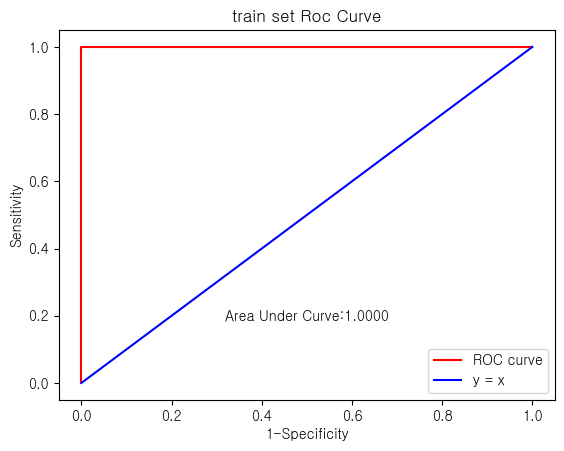

In [22]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_train), train_pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_train), train_pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [23]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5189
           1       1.00      1.00      1.00       982

    accuracy                           1.00      6171
   macro avg       1.00      1.00      1.00      6171
weighted avg       1.00      1.00      1.00      6171



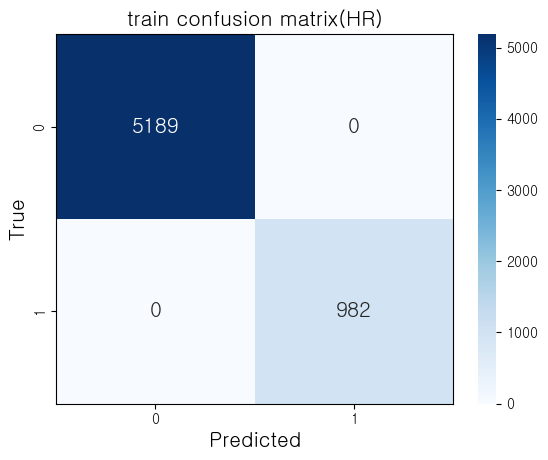

In [24]:
cm = confusion_matrix(y_train, train_pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('train confusion matrix(HR)', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

### valid

In [25]:
pred = xgb.predict(X_valid)
print(pd.DataFrame(pred).head())

pred_prob = xgb.predict_proba(X_valid)
print(pd.DataFrame(pred_prob[:,1]).head())

   0
0  0
1  0
2  0
3  1
4  0
          0
0  0.000098
1  0.000016
2  0.000011
3  0.992111
4  0.000040


In [26]:
pred_prob.shape

(411, 2)

In [27]:
y_valid

0      0
1      0
2      0
3      1
4      0
      ..
406    1
407    1
408    0
409    0
410    1
Name: Biopsy_HR, Length: 411, dtype: int64

In [28]:
accuracy = accuracy_score(y_valid, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.08%


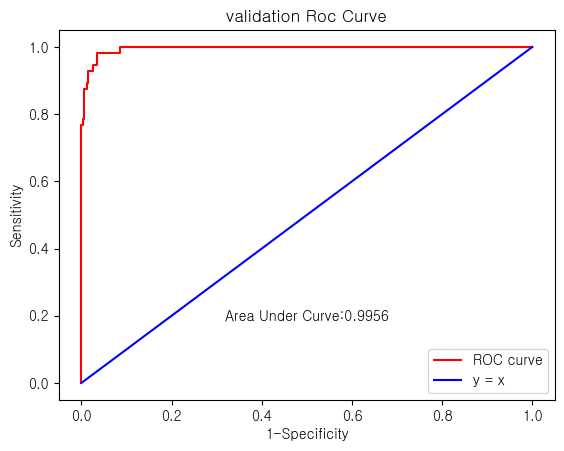

In [29]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_valid), pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_valid), pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('validation Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [30]:
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       355
           1       0.87      0.93      0.90        56

    accuracy                           0.97       411
   macro avg       0.93      0.95      0.94       411
weighted avg       0.97      0.97      0.97       411



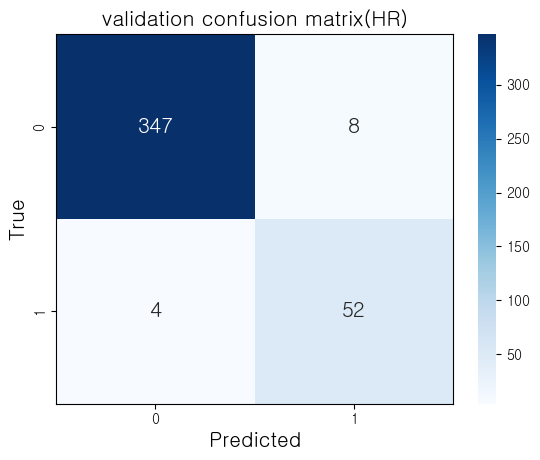

In [31]:
cm = confusion_matrix(y_valid, pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('validation confusion matrix(HR)', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

### test

In [32]:
test_pred = xgb.predict(X_test)
test_pred_prob = xgb.predict_proba(X_test)

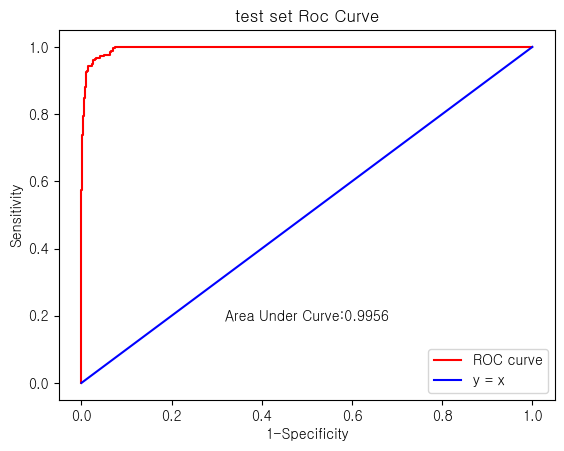

In [33]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_test), test_pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_test), test_pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [34]:
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.87%


In [35]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1394
           1       0.92      0.94      0.93       252

    accuracy                           0.98      1646
   macro avg       0.96      0.96      0.96      1646
weighted avg       0.98      0.98      0.98      1646



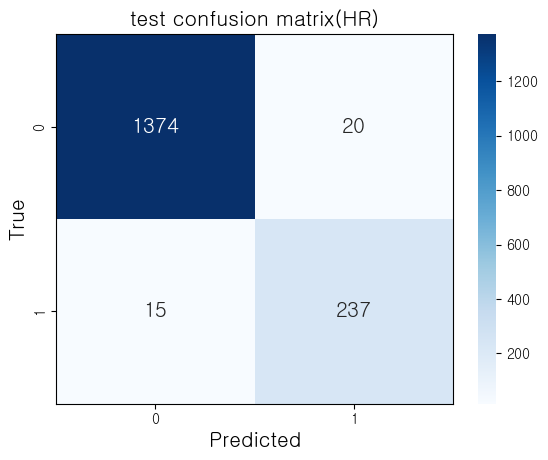

In [36]:
cm = confusion_matrix(y_test, test_pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('test confusion matrix(HR)', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

### 신촌 데이터셋 보기

In [37]:
ex_pred = xgb.predict(ex_copy)
ex_pred_prob = xgb.predict_proba(ex_copy)

In [38]:
ex1['Answer'].value_counts()

1    587
0    173
Name: Answer, dtype: int64

In [39]:
587/760

0.7723684210526316

In [40]:
pd.Series(ex_pred).value_counts()

0    433
1    327
dtype: int64

In [41]:
ex1['answer1'] = ex1['pcr_urine'].apply(lambda x: 1 if 1 <= x else 0 )

In [42]:
ex1[['answer1', 'pcr_urine']]

,answer1,pcr_urine
0,1,3.31
1,1,1.17
2,1,1.55
3,1,1.55
4,1,7.55
...,...,...
755,0,0.07
756,1,497.90
757,1,497.90
758,0,0.06


In [43]:
print(ex1.answer1.value_counts())
label_ratios = ex1['answer1'].value_counts() / len(ex1['answer1'])
print(label_ratios)

1    480
0    280
Name: answer1, dtype: int64
1    0.631579
0    0.368421
Name: answer1, dtype: float64


In [44]:
print(ex_pred)
print(ex_pred_prob)

[0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1
 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1
 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0
 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1
 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 0 1 0 1 0 0 

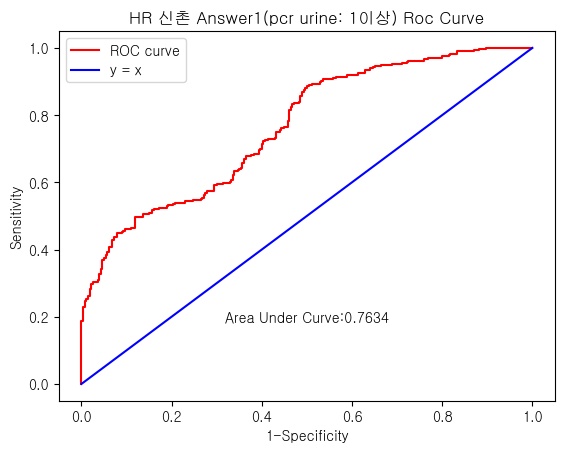

In [45]:
# roc curve, auc 신촌 set
fpr, tpr, thresholds = roc_curve(np.array(ex1['answer1']), ex_pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(ex1['answer1']), ex_pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('HR 신촌 Answer1(pcr urine: 1이상) Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [46]:
print(classification_report(ex1['answer1'], ex_pred))

              precision    recall  f1-score   support

           0       0.49      0.76      0.60       280
           1       0.80      0.54      0.65       480

    accuracy                           0.62       760
   macro avg       0.65      0.65      0.62       760
weighted avg       0.69      0.62      0.63       760



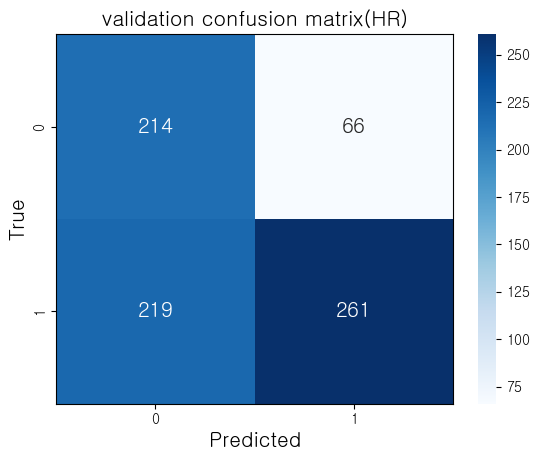

In [48]:
cm = confusion_matrix(ex1['answer1'], ex_pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('validation confusion matrix(HR)', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()